$$Importing\;neccessary\;libraries:$$

In [0]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random as rd
import math
from numpy.linalg import eig
from numpy import array
from numpy import mean
from numpy import cov

$$Visualizing\;the\;data:Applying\;PCA\;on\;image\;to\;reduce\;redudancies\;in\;an\;image\;patch.$$

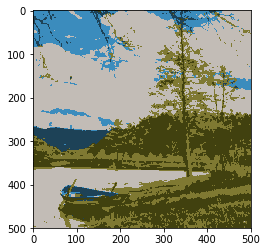

In [4]:
data=cv2.imread('kmeans.png')
plt.imshow(data[:,:,[2,1,0]])

$$Taking\;a\;small\;image\;patch\;of\;size\;10x10\;i.e\;at\;pixels\;between\;450\;and\;500\; in\;orginal\;image\;in\;both\;y\;and\;x\;directions:$$

In [0]:
data_matrix=list()
for i in range(np.shape(data)[0]-50,np.shape(data)[0]):
  for j in range(np.shape(data)[1]-50,np.shape(data)[1]):
    data_matrix.append(data[i][j])
    
data_matrix=np.transpose(data_matrix)

$$Standardizing\;the\;data\;to\;calculate\;covaraince\;matrix:$$

In [0]:
data_matrix=np.array(data_matrix)
mean_column=mean(data_matrix, axis=1)
mean_data_matrix=list()
for i in range(np.shape(data_matrix)[1]):
  mean_data_matrix.append(mean_column)

zm_data_matrix=data_matrix-np.transpose(mean_data_matrix)

$$\;Calculating\;the\;covariance\;matrix\;of\;data\;matrix.$$

In [0]:
covariance_matrix=np.dot(zm_data_matrix,np.transpose(zm_data_matrix))/np.shape(data_matrix)[1]

$$\;Calculating\;the\;eigen\;values\;of\;covariance\;matrix.$$
$$Transforming\;the\;data:
Y=PX
\;where\;P=matrix\;consisting\;of\;eigen\;vectors.$$

In [0]:
values,vectors=eig(covariance_matrix)
e_matrix=vectors

transformed_data_matrix=np.dot(np.transpose(e_matrix),data_matrix)

$$Checking\;whether\;the\;algorithm\;working\;as\;intended:\;If \;algorithm\;works\;properly\;then\;covariance\;matrix\;of\; transformed\; data\;matrix\;(Y=PX)should\;be\;a\;diagonal\;matrix\;(Since\;we\;decorrelate\;the\;data)and\;the\; diagonal \;should\;consist\;of\;eigen\;values\;of\;covariance\;matrix.$$

In [0]:
mean_column1=mean(transformed_data_matrix, axis=1)
mean_transformed_data_matrix=list()
for i in range(np.shape(data_matrix)[1]):
  mean_transformed_data_matrix.append(mean_column1)

zm_transformed_data_matrix=transformed_data_matrix-np.transpose(mean_transformed_data_matrix)

$$covariance\;matrix\;of\;transformed\;data\;matrix:$$

In [10]:
#covariance matrix of tranformed data matrix:
transformed_covariance_matrix=np.dot(zm_transformed_data_matrix,np.transpose(zm_transformed_data_matrix))/(np.shape(data_matrix)[1])
print(transformed_covariance_matrix)
print('eigen values:')
print(values)

[[ 1.26580938e+03 -5.81712811e-13 -1.33561571e-12]
 [-5.81712811e-13  2.50843625e+01  2.79590040e-13]
 [-1.33561571e-12  2.79590040e-13  1.51946610e-01]]
eigen values:
[1.26580938e+03 2.50843625e+01 1.51946610e-01]


$$So\;algorithm\;worked\;properly\;since\;the\;covaraince\; matrix\;of\;transformed\;data\;matrix\;is\;a\;(almost)\;diagonal\;matrix.The\;elements\;other\;than\;diagonal\;elements\;are\;very\;less(nearly\;zero).The\;diagonal \;elements\;of\;matrix\;are\;equal\;to\;eigen\;values.$$

$$\;Image\;patch\;from\;transformed\;data\;matrix$$

In [0]:
transformed_image_patch=list()
k=0
for i in range(50):
  l=list()
  for j in range(50):
    l.append(np.transpose(transformed_data_matrix)[k])
    k+=1
  transformed_image_patch.append(np.array(l))

transformed_image_patch=np.array(transformed_image_patch)

$$Transformed\;image\;patch:$$

original patch:


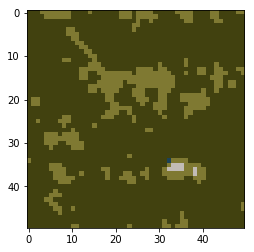

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tranformed patch:


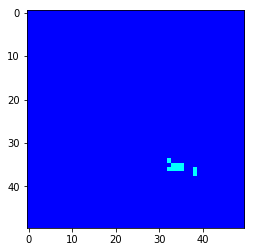

In [12]:
print('original patch:')
plt.imshow(data[450:500,450:500][:,:,[2,1,0]])
plt.show()
print('tranformed patch:')
plt.imshow(transformed_image_patch[:,:,[2,1,0]])

$$
Examples\;where\;PCA\;fails: 
$$

$$
\implies The\;standard\;PCA\;always\;finds\;linear\;principal\;components\;to\;represent\;the\;data\;in\;lower\;dimension.\;Sometime, \;we\;need\;non-linear\;principal\;components.\;In\;this\;case\;we\;use\;kernel\;PCA.
$$

$$
\implies PCA\;always\;finds\;orthogonal\;principal\;components.\; Sometimes,\;our\;data\;demands\;non-orthogonal\;principal\; components\;to\;represent\;the\;data.
$$